# 차량 EV 경진대회

## Data Import

In [109]:
import pandas as pd
import os 

train = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/dacon/CarEV/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/dacon/CarEV/test.csv')
submit = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/dacon/CarEV/sample_submission.csv')

In [110]:
train.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


In [111]:
test.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,8,No,0
2,TEST_002,B사,i5,Brand New,NaN,RWD,7197,7,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,7,No,1
4,TEST_004,K사,EV6,Brand New,NaN,FWD,7597,10,No,0


In [112]:
submit.head()

,ID,가격(백만원)
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0


In [113]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes,columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) *100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    
    return summ
summary(train)

data shape: (7497, 11)


,data type,#missing,%missing,#unique,min,max
ID,object,0,0.000000,7497,NaN,NaN
제조사,object,0,0.000000,7,NaN,NaN
모델,object,0,0.000000,21,NaN,NaN
차량상태,object,0,0.000000,3,NaN,NaN
배터리용량,float64,2711,36.161131,194,46.0,99.8
구동방식,object,0,0.000000,3,NaN,NaN
주행거리(km),int64,0,0.000000,6916,3.0,199827.0
보증기간(년),int64,0,0.000000,11,0.0,10.0
사고이력,object,0,0.000000,2,NaN,NaN
연식(년),int64,0,0.000000,3,0.0,2.0


In [114]:
cat_col = []
bin_col = []
con_col = []

for i in train.columns:
    if train[i].nunique() > 21 :
        con_col.append(i)
    elif (train[i].nunique() <= 21) & (train[i].nunique() > 2):
        cat_col.append(i)
    else:
        bin_col.append(i)
        
con_col.remove('ID')
print('범주형 변수: ',cat_col)
print('이산형 변수: ',bin_col)
print('연속형 변수: ',con_col)

범주형 변수:  ['제조사', '모델', '차량상태', '구동방식', '보증기간(년)', '연식(년)']
이산형 변수:  ['사고이력']
연속형 변수:  ['배터리용량', '주행거리(km)', '가격(백만원)']


"한글을 인식하지 못할 상황을 대비한 전처리"


In [115]:
test['제조사'] = test['제조사'].apply(lambda x: x.replace('사',''))
train['제조사'] = train['제조사'].apply(lambda x: x.replace('사',''))
train.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


## EDA

In [116]:
df_c = train.copy()
df_c.drop('ID',axis=1,inplace=True)
df_c.head()

,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,P,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,K,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,A,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,A,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,B,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


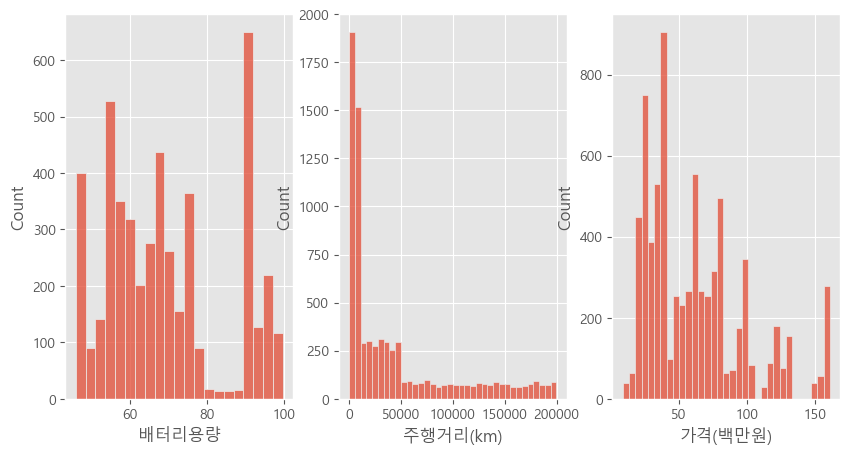

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('ggplot')

# 각 Feature의 분포도 plot
fig,ax = plt.subplots(1,3,figsize=(10,5))
ax = ax.flatten()

for i,col in enumerate(con_col):
    sns.histplot(df_c[col],ax=ax[i])

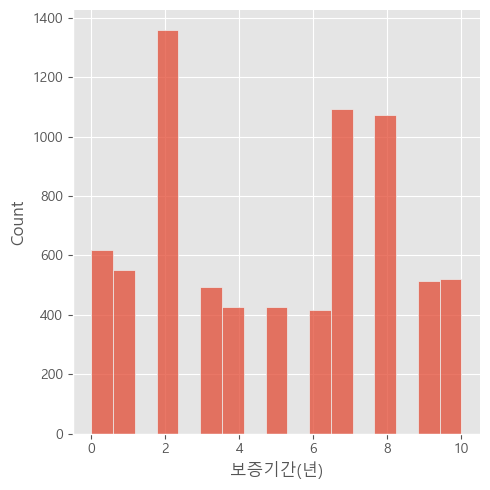

In [118]:
sns.displot(df_c['보증기간(년)'])

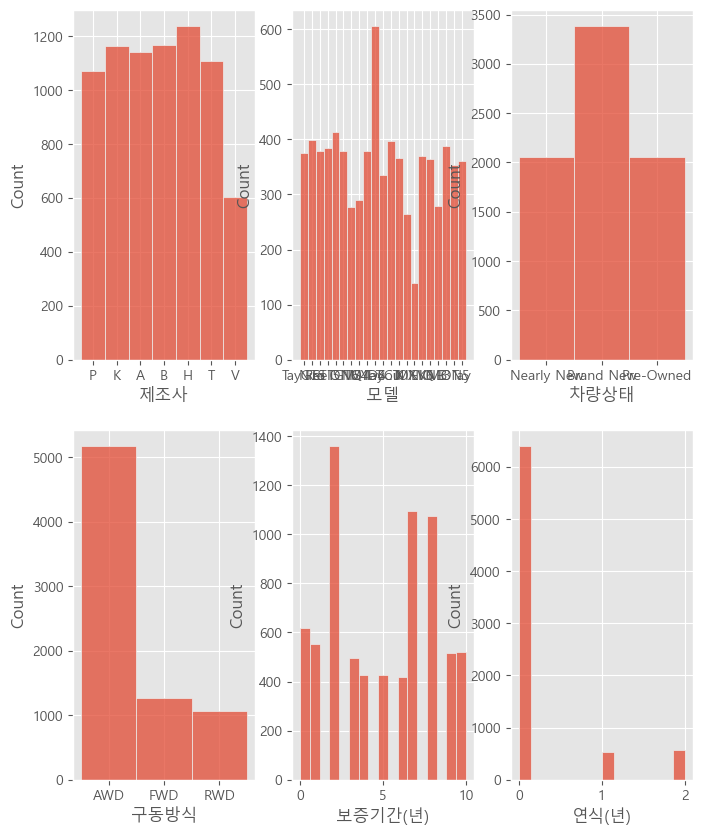

In [119]:
#범주형 변수의 분포
fig,ax = plt.subplots(2,3,figsize=(8,10))
ax = ax.flatten()
for i,col in enumerate(cat_col):
    sns.histplot(x=df_c[col],ax=ax[i])

### 0. 종속변수(가격)
- skewness:1
결측치 X

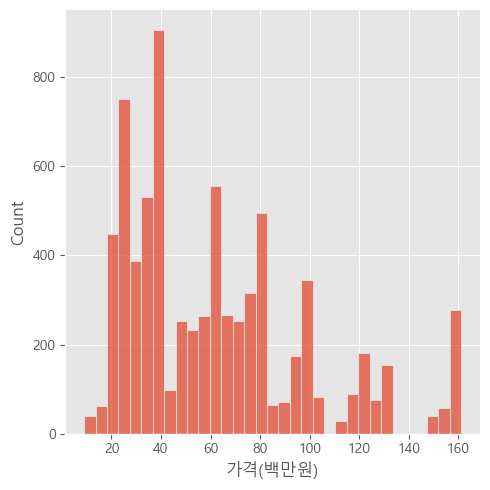

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('ggplot')

sns.displot(train['가격(백만원)'])

In [121]:
train.columns

Index(['ID', '제조사', '모델', '차량상태', '배터리용량', '구동방식', '주행거리(km)', '보증기간(년)',
       '사고이력', '연식(년)', '가격(백만원)'],
      dtype='object')

### 1. 제조사
- 각 제조사별 (7개)의 도수가 비슷함
- P 제조사가 가장 차량의 가격이 높다.

<Axes: xlabel='제조사', ylabel='가격(백만원)'>

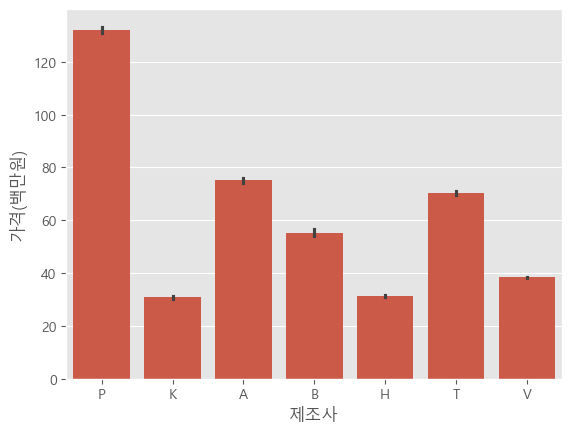

In [122]:
sns.barplot(y=train['가격(백만원)'],x=train['제조사'])

### 2. 모델
- 대체로 분포 균일
- 'TayGTS'모델의 값이 가장 높으며, IonicQ의 모델 가격이 가장 낮음



In [123]:
train['모델'].unique()

array(['TayGTS', 'Niro', 'eT', 'RSeTGT', 'i5', 'ION6', 'MS', 'MY', 'Q4eT',
       'ID4', 'TayCT', 'Soul', 'iX', 'MX', 'IONIQ', 'EV6', 'KNE', 'M3',
       'i3', 'ION5', 'Tay'], dtype=object)

<Axes: ylabel='가격(백만원)'>

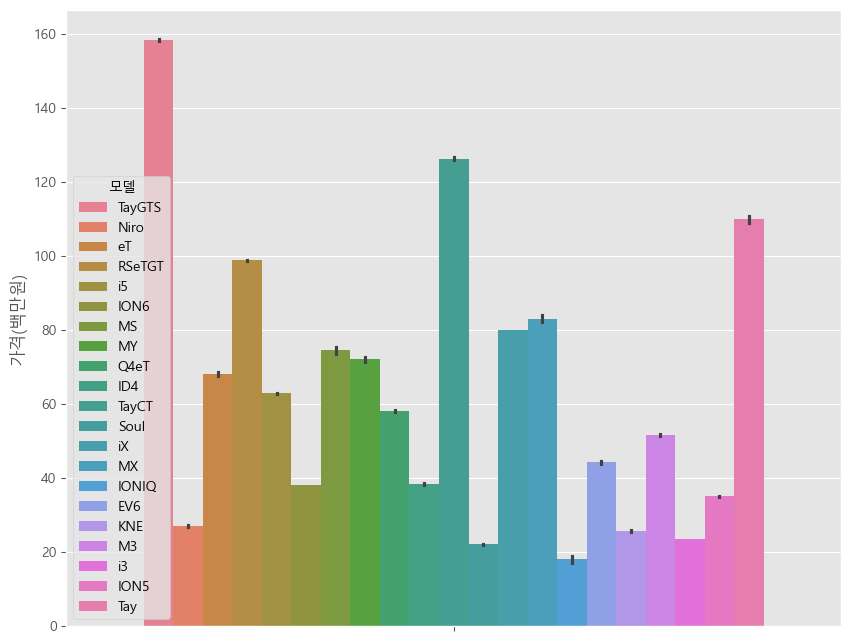

In [124]:
plt.figure(figsize=(10,8))
sns.barplot(y=train['가격(백만원)'],hue=train['모델'])

### 3. 차량상태
- 분포도 비슷하고, 차량상태에따른 가격 변동차이도 거의 없음.
- **'nearly-new'와 'pre-owned'의 차이점에 대한 궁금증** 
    - nearly-new 보다는 pre-owned가 더 많은 주행거리를 가지고 있음.

<Axes: ylabel='가격(백만원)'>

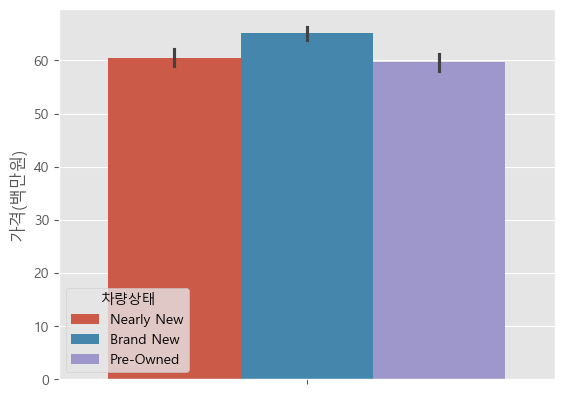

In [125]:
sns.barplot(y=train['가격(백만원)'],hue=train['차량상태'])

Pre-Owned 최소 거리: 11477
nearly-new 최소 거리: 10004


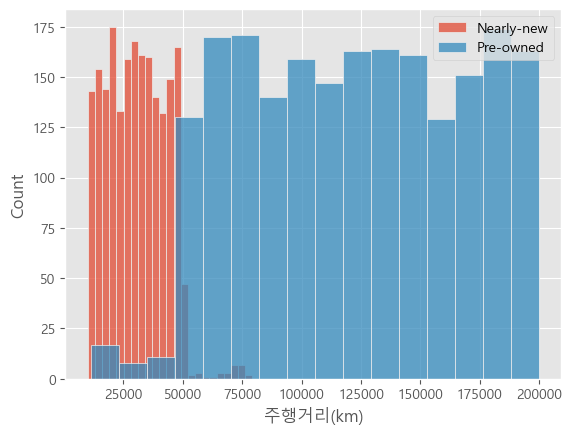

In [126]:
sns.histplot(train.loc[train['차량상태']=='Nearly New']['주행거리(km)'],label='Nearly-new')
sns.histplot(train.loc[train['차량상태']=='Pre-Owned']['주행거리(km)'],label='Pre-owned')

plt.legend()

print('Pre-Owned 최소 거리:',train.loc[train['차량상태']=='Pre-Owned']['주행거리(km)'].min())
print('nearly-new 최소 거리:',train.loc[train['차량상태']=='Nearly New']['주행거리(km)'].min())

### 4. 배터리용량 
- 용량이 69.397187인 도수가 가장 많은 부분을 차지.
- 대체로 배터리용량이 증가할 수록 가격도 상승하는 상관관계

In [127]:
train['배터리용량'].isna().sum()

2711

In [128]:
df_missing_train = train.loc[train['배터리용량'].isna()]
df_missing_test = test.loc[test['배터리용량'].isna()]

<Axes: xlabel='배터리용량', ylabel='가격(백만원)'>

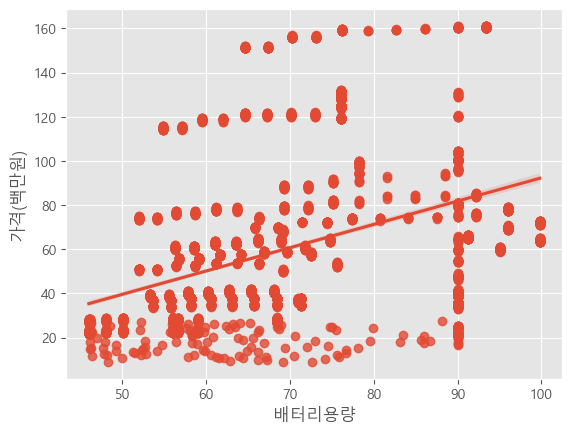

In [129]:
sns.regplot(y=train['가격(백만원)'],x=train['배터리용량'])

### 5. 구동방식
- 분포에는 크게 차이는 없다. AWD의 가격이 많이 높다

<Axes: ylabel='가격(백만원)'>

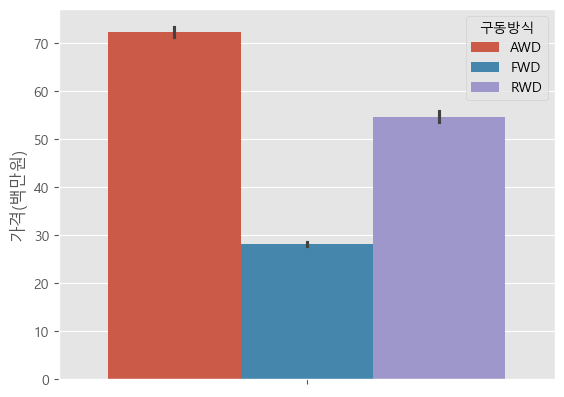

In [130]:
sns.barplot(y=train['가격(백만원)'],hue=train['구동방식'])

### 6. 주행거리(km)
- 주행거리 10000km이하가 전체의 절반 이상을 차지함.

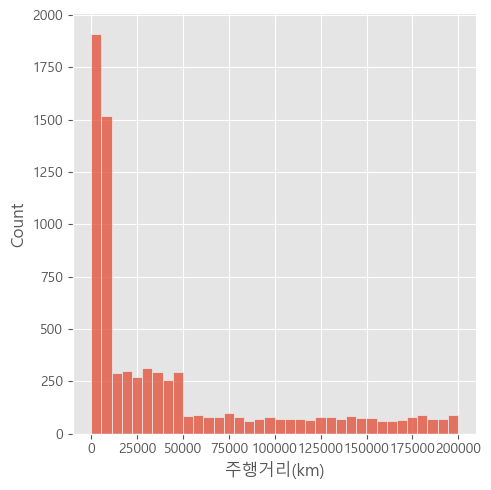

In [131]:
sns.displot(train['주행거리(km)'])

(7497, 11)

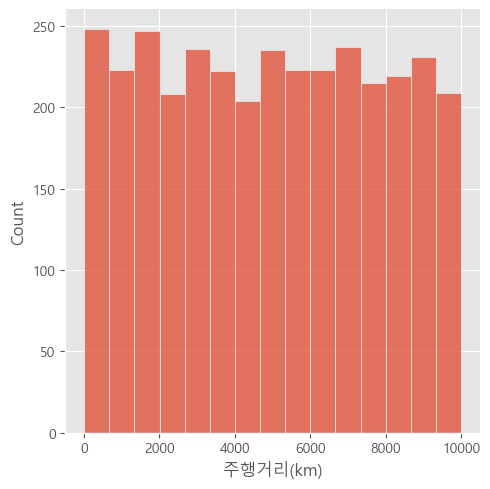

In [132]:
sns.displot(train.loc[train['주행거리(km)']<10000,'주행거리(km)'])
train.shape

## Feature Engineering
- 종속변수에 가장 상관관계 -> 배터리용량 / 보증기간

In [133]:
df_c = train.copy()
train_ID = df_c['ID']

df1_c = test.copy()
test_ID = df1_c['ID']

df_c.drop('ID',axis=1,inplace=True)
df1_c.drop('ID',axis=1,inplace=True)

df_c.corr(numeric_only=True)

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.576538,0.558242,-0.021845,0.431668
주행거리(km),-0.576538,1.000000,-0.664071,-0.089586,-0.035488
보증기간(년),0.558242,-0.664071,1.000000,0.035294,-0.349962
연식(년),-0.021845,-0.089586,0.035294,1.000000,-0.058455
가격(백만원),0.431668,-0.035488,-0.349962,-0.058455,1.000000


In [134]:
#df_c['배터리용량'] = df_c['배터리용량'].fillna(df_c['배터리용량'].mean())
#df1_c['배터리용량'] = df1_c['배터리용량'].fillna(df1_c['배터리용량'].mean())

주행 거리에 따른 등급 feature 추가(A,B,C)
- A:0~10000
- B:10000~50000
- C:50000이상 

In [139]:
for i in [df_c,df1_c]:
    i['run_dis'] = 'A'
    i.loc[i['주행거리(km)']>50000,'run_dis'] = 'C'
    i.loc[(i['주행거리(km)']<=50000)&(i['주행거리(km)']>=10000),'run_dis'] = 'B'

cat_col.append('run_dis')

Label Encoding for Categorical Data

In [141]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_c[cat_col] = df_c[cat_col].apply(lambda x: le.fit_transform(x))
df1_c[cat_col] = df1_c[cat_col].apply(lambda x: le.fit_transform(x))

df_c['사고이력']  = le.fit_transform(df_c['사고이력'])
df1_c['사고이력']  = le.fit_transform(df1_c['사고이력'])

## 모델 탐색

### XGBRegressor
- xgboost 자체처리: 1.473 (아무 파라미터 조정X)
- 'run_dis' column 추가: 1.4673

In [142]:
from optuna import Trial,visualization
from optuna.samplers import TPESampler
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error


def objectivexgr(trial:Trial,X,y):
    param = {'random_state':42,
             'n_estimators':772,
             'learning_rate':0.221,
             'max_depth':6,
             'min_child_weight':5} 
    model = XGBRegressor(**param)
    xgb_model = model.fit(X,y,verbose=False)
    answer = xgb_model.predict(X)
    score = root_mean_squared_error(y,answer)

    return score

In [143]:
study = optuna.create_study(direction='minimize',sampler=TPESampler(seed=2024))

study.optimize(lambda trial: objectivexgr(trial,df_c.drop(columns=['가격(백만원)']),df_c['가격(백만원)']),n_trials=10)
print('Best trial: score: {}, \nparmas: {}'.format(study.best_trial.value,study.best_trial.params))

[I 2025-01-09 17:12:41,693] A new study created in memory with name: no-name-cf4e1b10-3f84-4c00-9448-4ff29cdf3ff0
[I 2025-01-09 17:12:42,299] Trial 0 finished with value: 0.6796717190072196 and parameters: {}. Best is trial 0 with value: 0.6796717190072196.
[I 2025-01-09 17:12:42,891] Trial 1 finished with value: 0.6796717190072196 and parameters: {}. Best is trial 0 with value: 0.6796717190072196.
[I 2025-01-09 17:12:43,479] Trial 2 finished with value: 0.6796717190072196 and parameters: {}. Best is trial 0 with value: 0.6796717190072196.
[I 2025-01-09 17:12:44,069] Trial 3 finished with value: 0.6796717190072196 and parameters: {}. Best is trial 0 with value: 0.6796717190072196.
[I 2025-01-09 17:12:44,657] Trial 4 finished with value: 0.6796717190072196 and parameters: {}. Best is trial 0 with value: 0.6796717190072196.
[I 2025-01-09 17:12:45,264] Trial 5 finished with value: 0.6796717190072196 and parameters: {}. Best is trial 0 with value: 0.6796717190072196.
[I 2025-01-09 17:12:45

Best trial: score: 0.6796717190072196, 
parmas: {}


In [144]:
optuna.visualization.plot_optimization_history(study)

In [145]:
print(df_c.shape,df1_c.shape)
X,y = df_c.drop(columns=['가격(백만원)']),df_c['가격(백만원)']
X_test = df1_c

(7497, 11) (846, 10)


In [146]:
X_test.dtypes

제조사           int64
모델            int64
차량상태          int64
배터리용량       float64
구동방식          int64
주행거리(km)      int64
보증기간(년)       int64
사고이력          int64
연식(년)         int64
run_dis       int32
dtype: object

In [148]:
import numpy as np
from sklearn.model_selection import KFold
folds = KFold(n_splits=5,shuffle=True,random_state=2025)

test_prediction = np.zeros(len(X_test))
val_scores = []

for idx,(train_idx,val_idx) in enumerate(folds.split(X,y)):
    print(f'Fold {idx+1} / Fold {folds.n_splits}')
    X_train,y_train = X.iloc[train_idx],y.iloc[train_idx]
    X_val,y_val = X.iloc[val_idx],y.iloc[val_idx]

    xgb_model = XGBRegressor(**study.best_params)

    xgb_model.fit(X_train,y_train)

    train_y_pred = xgb_model.predict(X_train)
    val_y_pred = xgb_model.predict(X_val)

    print(f'Train RMSE: {root_mean_squared_error(y_train,train_y_pred)}')
    print(f'Val RMSE: {root_mean_squared_error(y_val,val_y_pred)}')
    print('-'*30)

    #Average of the Fold's Prediction for test data(X_test) => using as the submission
    test_prediction += xgb_model.predict(X_test) / folds.n_splits   #5-fold
    y_preds = xgb_model.predict(X_val)
    val_scores.append(root_mean_squared_error(y_val,y_preds))

print(f'RMSE: {np.array(val_scores).mean()}')

Fold 1 / Fold 5
Train RMSE: 0.806642250740836
Val RMSE: 1.3279612453103895
------------------------------
Fold 2 / Fold 5
Train RMSE: 0.7772843288424106
Val RMSE: 1.5168969171717457
------------------------------
Fold 3 / Fold 5
Train RMSE: 0.7637315105786793
Val RMSE: 1.628376837180181
------------------------------
Fold 4 / Fold 5
Train RMSE: 0.7681478708315297
Val RMSE: 1.4470327184880667
------------------------------
Fold 5 / Fold 5
Train RMSE: 0.7475100330151205
Val RMSE: 1.4163950181585865
------------------------------
RMSE: 1.4673325472617937


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

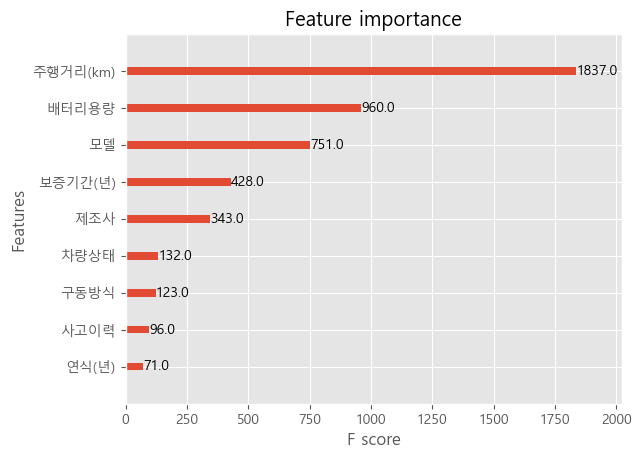

In [74]:
import xgboost
xgboost.plot_importance(xgb_model)

### Light-GBM
- 아무 전처리X : 1.357(실제로는 XGB보다 낮음)

In [85]:
from optuna import trial,visualization
from optuna.samplers import TPESampler
import optuna

from lightgbm import LGBMRegressor
def objectivelgb(trial:Trial,X,y):
    param ={'random_state':2025}

    lgb_model = LGBMRegressor(**param)
    lgb_model.fit(X,y)

    pred = lgb_model.predict(X)
    score = root_mean_squared_error(y,pred)

    return score

In [86]:
study = optuna.create_study(direction='minimize',sampler=TPESampler(seed=2025))

study.optimize(lambda trial: objectivelgb(trial,df_c.drop(columns=['가격(백만원)']),df_c['가격(백만원)']),n_trials=10)
print('Best trial: score: {}, \nparmas: {}'.format(study.best_trial.value,study.best_trial.params))

[I 2025-01-09 16:37:50,443] A new study created in memory with name: no-name-6935c223-15df-47b2-9d35-48c5a0d87d63
[I 2025-01-09 16:37:50,788] Trial 0 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.
[I 2025-01-09 16:37:50,861] Trial 1 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[I 2025-01-09 16:37:50,932] Trial 2 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.
[I 2025-01-09 16:37:50,998] Trial 3 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.
[I 2025-01-09 16:37:51,065] Trial 4 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.
[I 2025-01-09 16:37:51,134] Trial 5 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[I 2025-01-09 16:37:51,206] Trial 6 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.
[I 2025-01-09 16:37:51,272] Trial 7 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.
[I 2025-01-09 16:37:51,343] Trial 8 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

[I 2025-01-09 16:37:51,414] Trial 9 finished with value: 1.1396787273940583 and parameters: {}. Best is trial 0 with value: 1.1396787273940583.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 9
[LightGBM] [Info] Start training from score 62.331949
Best trial: score: 1.1396787273940583, 
parmas: {}


In [87]:
import numpy as np
from sklearn.model_selection import KFold
folds = KFold(n_splits=5,shuffle=True,random_state=2025)

val_scores_lgb = []
test_pred_lgb = np.zeros(len(test))

for idx,(train_idx,val_idx) in enumerate(folds.split(X,y)):
    print(f'Fold: {idx+1} / Fold: {folds.n_splits}')
    X_train,y_train = X.iloc[train_idx],y.iloc[train_idx]
    X_val,y_val = X.iloc[val_idx],y.iloc[val_idx]

    lgb = LGBMRegressor(**study.best_params)
    lgb_model = lgb.fit(X_train,y_train)
    lgb_model.fit(X_train,y_train)

    train_y_pred = lgb_model.predict(X_train)
    val_y_pred = lgb_model.predict(X_val)

    print(f'Train RMSE: {root_mean_squared_error(y_train,train_y_pred)}')
    print(f'Val RMSE: {root_mean_squared_error(y_val,val_y_pred)}')
    print('-' * 30)

    test_pred_lgb += lgb_model.predict(X_test) / folds.n_splits
    val_scores_lgb.append(root_mean_squared_error(val_y_pred,y_val))

print(f'Average RMSE: {np.array(val_scores_lgb).mean()}')

Fold: 1 / Fold: 5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 9
[LightGBM] [Info] Start training from score 62.548199
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 9
[LightGBM] [Info] Start training from score 62.548199
Train RMSE: 1.1587186228044106
Val RMSE: 1.2428158267397245
------------------------------
Fold: 2 / Fold: 5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the ove

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

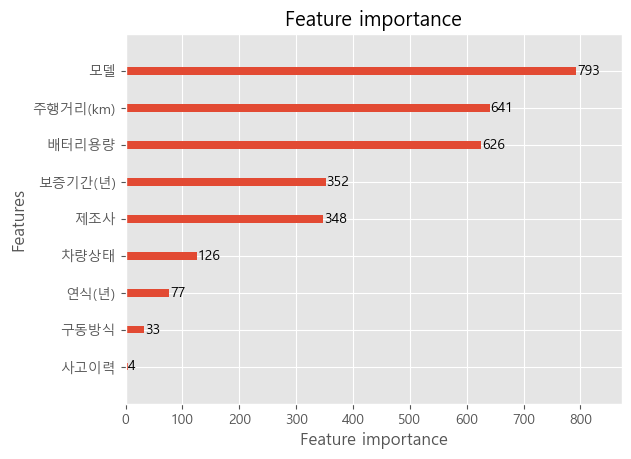

In [89]:
from lightgbm import plot_importance
plot_importance(lgb_model)

## 결과물 제출

In [90]:
submit.loc[submit['ID'].isin(test_ID),'가격(백만원)'] = test_pred_lgb
submit.to_csv('submit_nothing_hyperparam_lgb.csv',index=False)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30316\3466293101.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[130.56026181  80.02060894  64.92808397  35.0252487   47.85527738
 100.66169829  21.88539852  40.05865794  81.14929096  24.57024299
  64.04123269  62.65242699  40.24047192 100.15266122  90.93723801
  23.14614243 126.09241252  52.54568752  60.08269935  34.76737364
  37.77061074 160.79273559  47.12609319  55.8801629   23.12375512
  47.84509203  79.00919399  80.09435298  27.90706906 126.14545893
  63.69365878  40.83963401 114.85356547  87.99523606  35.63968696
  80.02261685  21.75451791  39.94971498  24.73141582 121.17794762
 126.65256616  18.51531372 119.43069715  60.83106007  23.10911089
 100.18054899  21.71007309  73.94359828  62.4010388   77.87251873
  35.78684614  16.87069324  38.75422389 126.49026687  23.72444716
  27.89116311 155.89751664  41.08349004 159.47291217  40.25700379
  55.89560

In [91]:
submit.head()

,ID,가격(백만원)
0,TEST_000,130.560262
1,TEST_001,80.020609
2,TEST_002,64.928084
3,TEST_003,35.025249
4,TEST_004,47.855277
